<a href="https://colab.research.google.com/github/MIKRAMS1984/DROO/blob/master/Code_to_save_a_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
#Creatin LRM Class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    
#Forward method to define the compuatatoin in the model.
  def forward(self, x:torch.Tensor)  -> torch.Tensor:
    return self.weights*x + self.bias

In [ ]:
import torch
torch.manual_seed(42)
model_0 = LinearRegressionModel() # calling fun.
model_0

LinearRegressionModel()

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

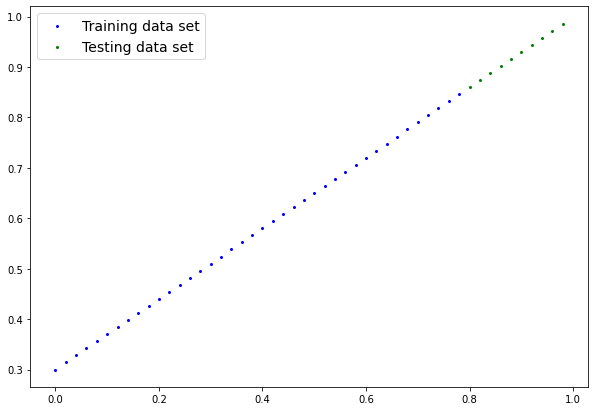

In [ ]:
import matplotlib.pyplot as plt


weight = 0.7
bias =0.3
start = 0
end = 1
step = 0.02
X =  torch.arange(start,end,step). unsqueeze(dim=1)
X,X.shape
y = weight*X + bias 
X[:10], y[:10], len(X), len(y)

train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c='b', s=4, label="Training data set")
  plt.scatter(test_data, test_labels, c='g', s=4, label="Testing data set")
  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")
  plt.legend(prop={"size":14})

plot_predictions() # calling fun.


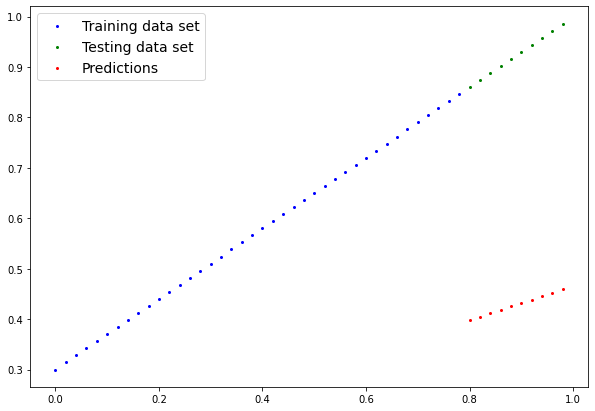

In [ ]:
#Make predictions with models
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

plot_predictions(predictions=y_preds)

In [ ]:
import torch
import torch.nn as nn
#setup a loss fun.
loss_fn = nn.L1Loss()
#setup an optimizer.
optimizer = torch.optim.SGD(params = model_0.parameters(),
                           lr = 0.1) #lr is hyperparameter

In [ ]:
torch.randn(1)

tensor([0.2345])

In [ ]:
# 5 Building blocks for creating a NN or Computaional Graph

#1.torch.nn
#2.torch.nn.Parameter
#3.torch.nn.Module
#4.torch.optim
#5.def forward()
#6.torch.utils.data.Dataset
#7.torch.utils.data.DataLoader


In [ ]:
#Building a training loop and a testing loop in pytorch.
torch.manual_seed(42)
#An epoc is the one loop through the data, it is hyperparameter because we set it
#explicitly.
epochs = 200
epoch_count = []
loss_values = []
test_loss_values = []


#Training

#0. loop through the data
for epoch in range(epochs):
     #1. set the model to training mode
    model_0.train() #gradients on
    
    #1. forward propagation
    y_pred = model_0(X_train)

    #2. calculate loss
    loss = loss_fn(y_pred, y_train)
    print(f"Loss: {loss}")

    #3. optimizer zero grad
    optimizer.zero_grad()

    #4. perform backpropagation w.r.t. to model parameters
    loss.backward()

   #5. Step the optimizer, perform GD
    optimizer.step()

   #Testing

    model_0.eval()
    with torch.inference_mode():
      #1. Do the Forward propagation.
      test_pred = model_0(X_test)
      #2. Loss Calcuation.
      test_loss = loss_fn(test_pred, y_test) 

    if epoch % 10 == 0:
     epoch_count.append(epoch)
     loss_values.append(loss)
     test_loss_values.append(test_loss)
     print(f"Epoch:{epoch} | Loss:{loss} | Test loss: {test_loss}")
     #print model state_dict()
     print(model_0.state_dict())  



Loss: 0.31288138031959534
Epoch:0 | Loss:0.31288138031959534 | Test loss: 0.35982614755630493
OrderedDict([('weights', tensor([0.3757])), ('bias', tensor([0.2288]))])
Loss: 0.1976713389158249
Loss: 0.08682452142238617
Loss: 0.04956193268299103
Loss: 0.04610266909003258
Loss: 0.04258420318365097
Loss: 0.03921257331967354
Loss: 0.03573219105601311
Loss: 0.032322462648153305
Loss: 0.028880193829536438
Loss: 0.025432366877794266
Epoch:10 | Loss:0.025432366877794266 | Test loss: 0.05427704378962517
OrderedDict([('weights', tensor([0.5898])), ('bias', tensor([0.3438]))])
Loss: 0.022041911259293556
Loss: 0.019071225076913834
Loss: 0.018788114190101624
Loss: 0.039773717522621155
Loss: 0.07543627172708511
Loss: 0.039773717522621155
Loss: 0.07543627172708511
Loss: 0.039773717522621155
Loss: 0.07543627172708511
Loss: 0.039773717522621155
Epoch:20 | Loss:0.039773717522621155 | Test loss: 0.11934101581573486
OrderedDict([('weights', tensor([0.6122])), ('bias', tensor([0.2588]))])
Loss: 0.0754362717

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)
  

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6512])), ('bias', tensor([0.3588]))])

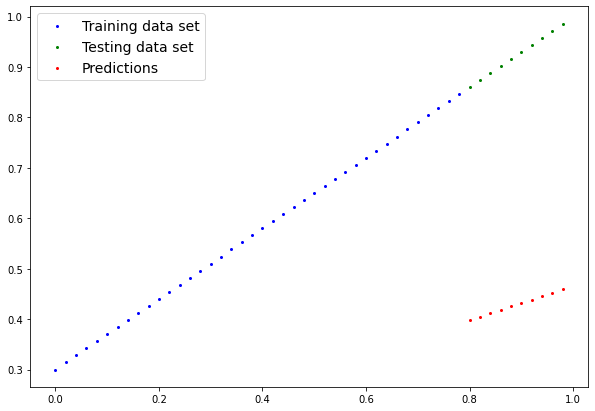

In [ ]:
plot_predictions(predictions = y_preds);

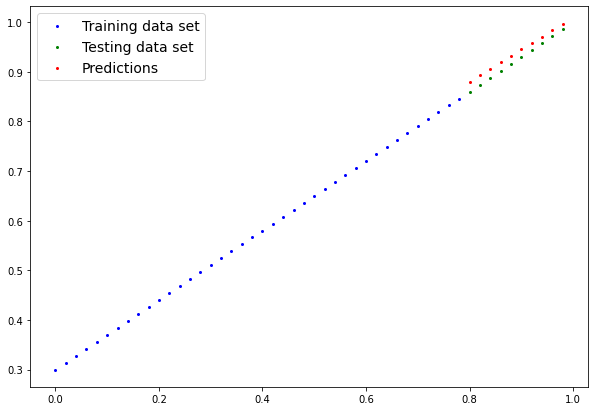

In [ ]:
plot_predictions(predictions = y_preds_new);

In [ ]:
epoch_count, loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<L1LossBackward0>),
  tensor(0.0254, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398, grad_fn=<L1LossBackward0>),
  tensor(0.0398

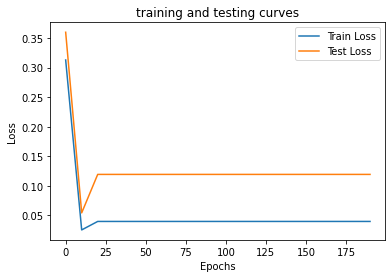

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("training and testing curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();



In [ ]:
# Saving a model in pytorch
# torch.save()
# torch.load()
# torch.nn.Module.load_state_dict()
model_0
modle_0.state_dict()


In [ ]:
# Saving our pytorch model
from pathlib import Path

# 1. Create model directory
MODEL_PATH = Path("MODELS")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)






In [ ]:
!ls -1 MODELS

01_pytorch_workflow_model_0.pth


In [ ]:
# Loading a model
model0.state_dict()

NameError: ignored